In [52]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, ExpectationMaximization
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

In [53]:
probability_categories = {
    'Low': (0.0, 0.33),
    'Medium': (0.34, 0.66),
    'High': (0.67, 1.0)
}

def probability_to_category(probability, categories):
    for category, (lower_bound, upper_bound) in categories.items():
        if lower_bound <= probability <= upper_bound:
            return category 

In [54]:
model = BayesianNetwork([
            ('current_skeleton', 'current_distance_crate'),
            ('presence_crate', 'current_distance_crate'),

            ('current_skeleton', 'current_distance_feeder'),
            ('presence_feeder', 'current_distance_feeder'),

            ('current_skeleton', 'current_distance_cup'),
            ('presence_cup', 'current_distance_cup'),

            ('predicted_skeleton', 'predicted_distance_crate'),
            ('presence_crate', 'predicted_distance_crate'),

            ('predicted_skeleton', 'predicted_distance_feeder'),
            ('presence_feeder', 'predicted_distance_feeder'),

            ('predicted_skeleton', 'predicted_distance_cup'),
            ('presence_cup', 'predicted_distance_cup'),

            ('current_skeleton', 'human_action'),
            ('predicted_skeleton', 'human_action'),
            ('current_distance_crate', 'human_action'),
            ('current_distance_feeder', 'human_action'),
            ('current_distance_cup', 'human_action'),
            ('predicted_distance_crate', 'human_action'),
            ('predicted_distance_feeder', 'human_action'),
            ('predicted_distance_cup', 'human_action')
        ])



data = {
    'presence_crate': [1, 1],
    'presence_feeder': [1, 0],
    'presence_cup': [0, 0],

    'current_skeleton': ['standing', 'crouching'],
    'current_distance_crate': ['close', 'close'],
    'current_distance_feeder': ['far', 'none'],
    'current_distance_cup': ['none', 'none'],

    'predicted_skeleton': ['crouching', 'standing'],
    'predicted_distance_crate': ['close', 'close'],
    'predicted_distance_feeder': ['close', 'none'],
    'predicted_distance_cup': ['none', 'none'],

    'human_action': ['refill_feeder', 'pickup_crate']
}


df = pd.DataFrame(data)
model.fit(df, estimator=MaximumLikelihoodEstimator)

inference = VariableElimination(model)

query = inference.query(
    variables=['human_action'], 
    evidence={
        'presence_crate': 1,
        'presence_feeder': 0,
        'current_skeleton': 'standing',
        'predicted_skeleton': 'crouching'
        }
    )

print(query)

+-----------------------------+---------------------+
| human_action                |   phi(human_action) |
+=============================+=====================+
| human_action(pickup_crate)  |              0.3750 |
+-----------------------------+---------------------+
| human_action(refill_feeder) |              0.6250 |
+-----------------------------+---------------------+


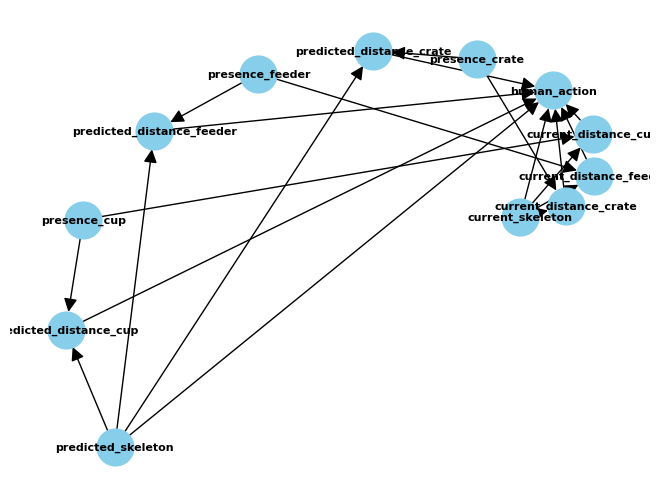

In [55]:
edges = model.edges()

G = nx.DiGraph()

G.add_edges_from(edges)
pos = nx.spiral_layout(G)  # You can use other layouts based on your preference
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, arrowsize=20)

# Display the graph
plt.show()